# EDA for cateforical variables

This is a practice of an exploratory data analysis for categorical and continuos variables.
Some of the code are inspired from:

https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way 

https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-part-2

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import re

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## Import Dataset

In [4]:
df = pd.read_csv('reading_habits.csv')
df.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [5]:
df.dtypes

Age                                                     int64
Sex                                                    object
Race                                                   object
Marital status?                                        object
Education                                              object
Employement                                            object
Incomes                                                object
How many books did you read during last 12months?       int64
Read any printed books during last 12months?           object
Read any audiobooks during last 12months?              object
Read any e-books during last 12months?                 object
Last book you read, you…                               object
Do you happen to read any daily news or newspapers?    object
Do you happen to read any magazines or journals?       object
dtype: object

In [6]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("")

Age
50    78
65    76
60    72
47    70
16    68
      ..
91     3
89     2
90     2
92     2
93     1
Name: Age, Length: 78, dtype: int64

Sex
Female    1479
Male      1353
Name: Sex, dtype: int64

Race
White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: Race, dtype: int64

Marital status?
Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: Marital status?, dtype: int64

Education
High school graduate                                        688
Some college, no 4-year degree                              651
College graduate   

In [7]:
dataset = df[['Age','Race','Sex','Education','Employement','How many books did you read during last 12months?','Read any printed books during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?','Incomes']]
dataset.head()

,Age,Race,Sex,Education,Employement,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?,Incomes
0,66,Refused,Male,College graduate,Retired,97,Yes,No,Yes,No,Yes,"$20,000 to under $30,000"
1,46,Native American/American Indian,Male,High school graduate,Employed full-time,97,Yes,Yes,Yes,Yes,Yes,"Less than $10,000"
2,32,Mixed race,Male,High school graduate,Employed full-time,97,No,Yes,Yes,Yes,Yes,"Less than $10,000"
3,27,Mixed race,Male,High school graduate,Employed full-time,97,Yes,No,Yes,Yes,No,"$40,000 to under $50,000"
4,16,Mixed race,Female,High school incomplete,Employed part-time,97,Yes,Yes,No,Yes,No,"$10,000 to under $20,000"


In [8]:
dataset = dataset.rename(columns={'How many books did you read during last 12months?':'Books_last_12m', 'Read any printed books during last 12months?': 'Printed_books', 'Read any audiobooks during last 12months?':'Audio_books','Read any e-books during last 12months?':'E_books','Do you happen to read any daily news or newspapers?':'Daily_news','Do you happen to read any magazines or journals?':'Magazines_journals'})

In [9]:
dataset['Incomes'].value_counts()

$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: Incomes, dtype: int64

In [10]:
dataset['Incomes'] = dataset['Incomes'].apply(lambda x: x[1:] if x == '9$100,000 to under $150,000' else x)

In [11]:
dataset['Incomes'].value_counts()

$100,000 to under $150,000    742
$50,000 to under $75,000      394
$75,000 to under $100,000     316
Refused                       291
$30,000 to under $40,000      265
$20,000 to under $30,000      238
$10,000 to under $20,000      216
$40,000 to under $50,000      207
Less than $10,000             163
Name: Incomes, dtype: int64

In [12]:
dataset = dataset.drop(dataset[dataset.Incomes == 'Refused'].index)
dataset.shape

(2541, 12)

In [13]:
dataset['Incomes_min'] = dataset['Incomes'].apply(lambda x: x.split(' ')[0])
dataset.Incomes_min.value_counts()


$100,000    742
$50,000     394
$75,000     316
$30,000     265
$20,000     238
$10,000     216
$40,000     207
Less        163
Name: Incomes_min, dtype: int64

In [14]:
dataset['Incomes_max'] = dataset['Incomes'].apply(lambda x: x.split(' ')[-1])
dataset.Incomes_max.value_counts()

$150,000    742
$75,000     394
$100,000    316
$40,000     265
$30,000     238
$20,000     216
$50,000     207
$10,000     163
Name: Incomes_max, dtype: int64

In [15]:
dataset['Incomes_min'] = dataset['Incomes_min'].replace('Less','0')
dataset.Incomes_min.value_counts()

$100,000    742
$50,000     394
$75,000     316
$30,000     265
$20,000     238
$10,000     216
$40,000     207
0           163
Name: Incomes_min, dtype: int64

In [16]:
dataset['Incomes_min'] = dataset['Incomes_min'].apply(lambda x: int(x.replace('$','').replace(',','')))
dataset['Incomes_max'] = dataset['Incomes_max'].apply(lambda x: int(x.replace('$','').replace(',','')))
dataset.dtypes

Age                    int64
Race                  object
Sex                   object
Education             object
Employement           object
Books_last_12m         int64
Printed_books         object
Audio_books           object
E_books               object
Daily_news            object
Magazines_journals    object
Incomes               object
Incomes_min            int64
Incomes_max            int64
dtype: object

In [17]:
dataset[{'Incomes_max', 'Incomes_min'}].value_counts()

Incomes_max  Incomes_min
150000       100000         742
75000        50000          394
100000       75000          316
40000        30000          265
30000        20000          238
20000        10000          216
50000        40000          207
10000        0              163
dtype: int64

In [18]:
dataset['Incomes_avg'] = dataset[['Incomes_min','Incomes_max']].mean(axis=1)
dataset['Incomes_avg'] = dataset['Incomes_avg'].astype(int)
dataset.head(1)

,Age,Race,Sex,Education,Employement,Books_last_12m,Printed_books,Audio_books,E_books,Daily_news,Magazines_journals,Incomes,Incomes_min,Incomes_max,Incomes_avg
0,66,Refused,Male,College graduate,Retired,97,Yes,No,Yes,No,Yes,"$20,000 to under $30,000",20000,30000,25000


## Taking care of missing data

'Don’t know' values.

In [19]:
len(dataset.loc[dataset.values == 'Don’t know'])/dataset.shape[0]*100

1.770956316410862

In [20]:
dataset.drop(dataset.loc[dataset.values == 'Don’t know'].index, inplace=True)
len(dataset.loc[dataset.values == 'Don’t know'])

0

In [21]:
dataset.isna().sum()

Age                     0
Race                    0
Sex                     0
Education               0
Employement             0
Books_last_12m          0
Printed_books         343
Audio_books           343
E_books               343
Daily_news              0
Magazines_journals      0
Incomes                 0
Incomes_min             0
Incomes_max             0
Incomes_avg             0
dtype: int64

### Fill every column with its own most frequent value

In [22]:
dataset = dataset.fillna(dataset.mode().iloc[0])
dataset.isna().sum()

Age                   0
Race                  0
Sex                   0
Education             0
Employement           0
Books_last_12m        0
Printed_books         0
Audio_books           0
E_books               0
Daily_news            0
Magazines_journals    0
Incomes               0
Incomes_min           0
Incomes_max           0
Incomes_avg           0
dtype: int64

## Exploratory Data Analysis

In [23]:
dataset.head()

,Age,Race,Sex,Education,Employement,Books_last_12m,Printed_books,Audio_books,E_books,Daily_news,Magazines_journals,Incomes,Incomes_min,Incomes_max,Incomes_avg
0,66,Refused,Male,College graduate,Retired,97,Yes,No,Yes,No,Yes,"$20,000 to under $30,000",20000,30000,25000
1,46,Native American/American Indian,Male,High school graduate,Employed full-time,97,Yes,Yes,Yes,Yes,Yes,"Less than $10,000",0,10000,5000
2,32,Mixed race,Male,High school graduate,Employed full-time,97,No,Yes,Yes,Yes,Yes,"Less than $10,000",0,10000,5000
3,27,Mixed race,Male,High school graduate,Employed full-time,97,Yes,No,Yes,Yes,No,"$40,000 to under $50,000",40000,50000,45000
4,16,Mixed race,Female,High school incomplete,Employed part-time,97,Yes,Yes,No,Yes,No,"$10,000 to under $20,000",10000,20000,15000


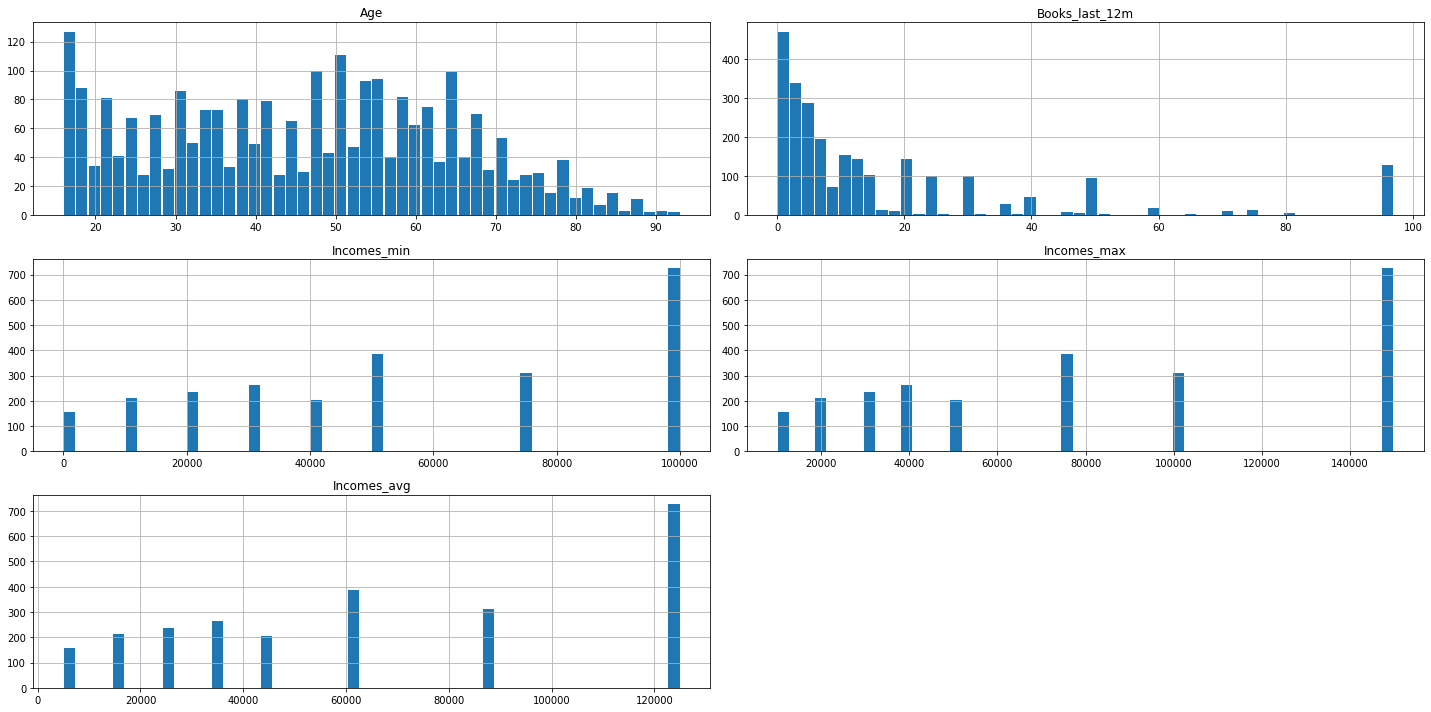

In [24]:
dataset.hist(bins=50, figsize=(20,10), rwidth=0.9)
#plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Age Distribution')]

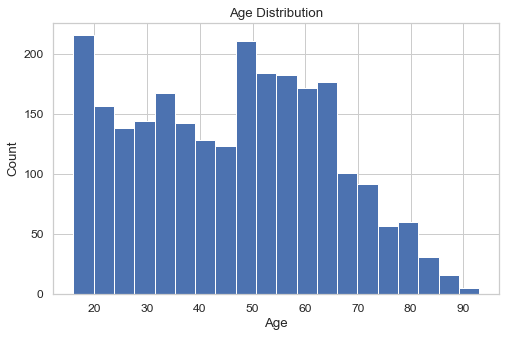

In [25]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8,5]})
sns.distplot(
    dataset['Age'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count', title='Age Distribution')

In [26]:
dataset['Sex'].unique()

array(['Male', 'Female'], dtype=object)

### Categorical Variables Analysis

In [27]:
dataset_cat = dataset.select_dtypes(include = 'object').copy()
dataset_cat.head()

,Race,Sex,Education,Employement,Printed_books,Audio_books,E_books,Daily_news,Magazines_journals,Incomes
0,Refused,Male,College graduate,Retired,Yes,No,Yes,No,Yes,"$20,000 to under $30,000"
1,Native American/American Indian,Male,High school graduate,Employed full-time,Yes,Yes,Yes,Yes,Yes,"Less than $10,000"
2,Mixed race,Male,High school graduate,Employed full-time,No,Yes,Yes,Yes,Yes,"Less than $10,000"
3,Mixed race,Male,High school graduate,Employed full-time,Yes,No,Yes,Yes,No,"$40,000 to under $50,000"
4,Mixed race,Female,High school incomplete,Employed part-time,Yes,Yes,No,Yes,No,"$10,000 to under $20,000"


In [28]:
dataset_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for c in dataset_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [dataset_cat[c].unique()]
    tmp['values_count_incna'] = len(list(dataset_cat[c].unique()))
    tmp['values_count_nona'] = int(dataset_cat[c].nunique())
    tmp['num_miss'] = dataset_cat[c].isnull().sum()
    tmp['pct_miss'] = (dataset_cat[c].isnull().sum() / len(dataset_stats)).round(3)*100
    dataset_stats = dataset_stats.append(tmp)
dataset_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Race,"[Refused, Native American/American Indian, Mix...",7,7,0,NaN
0,Sex,"[Male, Female]",2,2,0,0.0
0,Education,"[College graduate, High school graduate, High ...",7,7,0,0.0
0,Employement,"[Retired, Employed full-time, Employed part-ti...",8,8,0,0.0
0,Printed_books,"[Yes, No]",2,2,0,0.0
0,Audio_books,"[No, Yes]",2,2,0,0.0
0,E_books,"[Yes, No]",2,2,0,0.0
0,Daily_news,"[No, Yes]",2,2,0,0.0
0,Magazines_journals,"[Yes, No]",2,2,0,0.0
0,Incomes,"[$20,000 to under $30,000, Less than $10,000, ...",8,8,0,0.0


In [29]:
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
dataset_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

# And set the index to Column Names
dataset_stats.set_index('column', inplace = True)
dataset_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
Sex,"[Male, Female]",2,2,0,0.0
Printed_books,"[Yes, No]",2,2,0,0.0
Audio_books,"[No, Yes]",2,2,0,0.0
E_books,"[Yes, No]",2,2,0,0.0
Daily_news,"[No, Yes]",2,2,0,0.0
Magazines_journals,"[Yes, No]",2,2,0,0.0
Race,"[Refused, Native American/American Indian, Mix...",7,7,0,NaN
Education,"[College graduate, High school graduate, High ...",7,7,0,0.0
Employement,"[Retired, Employed full-time, Employed part-ti...",8,8,0,0.0


In [30]:
dataset_cat['Age'] = dataset.loc[dataset.index, 'Age'].copy()
dataset_cat.head()

,Race,Sex,Education,Employement,Printed_books,Audio_books,E_books,Daily_news,Magazines_journals,Incomes,Age
0,Refused,Male,College graduate,Retired,Yes,No,Yes,No,Yes,"$20,000 to under $30,000",66
1,Native American/American Indian,Male,High school graduate,Employed full-time,Yes,Yes,Yes,Yes,Yes,"Less than $10,000",46
2,Mixed race,Male,High school graduate,Employed full-time,No,Yes,Yes,Yes,Yes,"Less than $10,000",32
3,Mixed race,Male,High school graduate,Employed full-time,Yes,No,Yes,Yes,No,"$40,000 to under $50,000",27
4,Mixed race,Female,High school incomplete,Employed part-time,Yes,Yes,No,Yes,No,"$10,000 to under $20,000",16


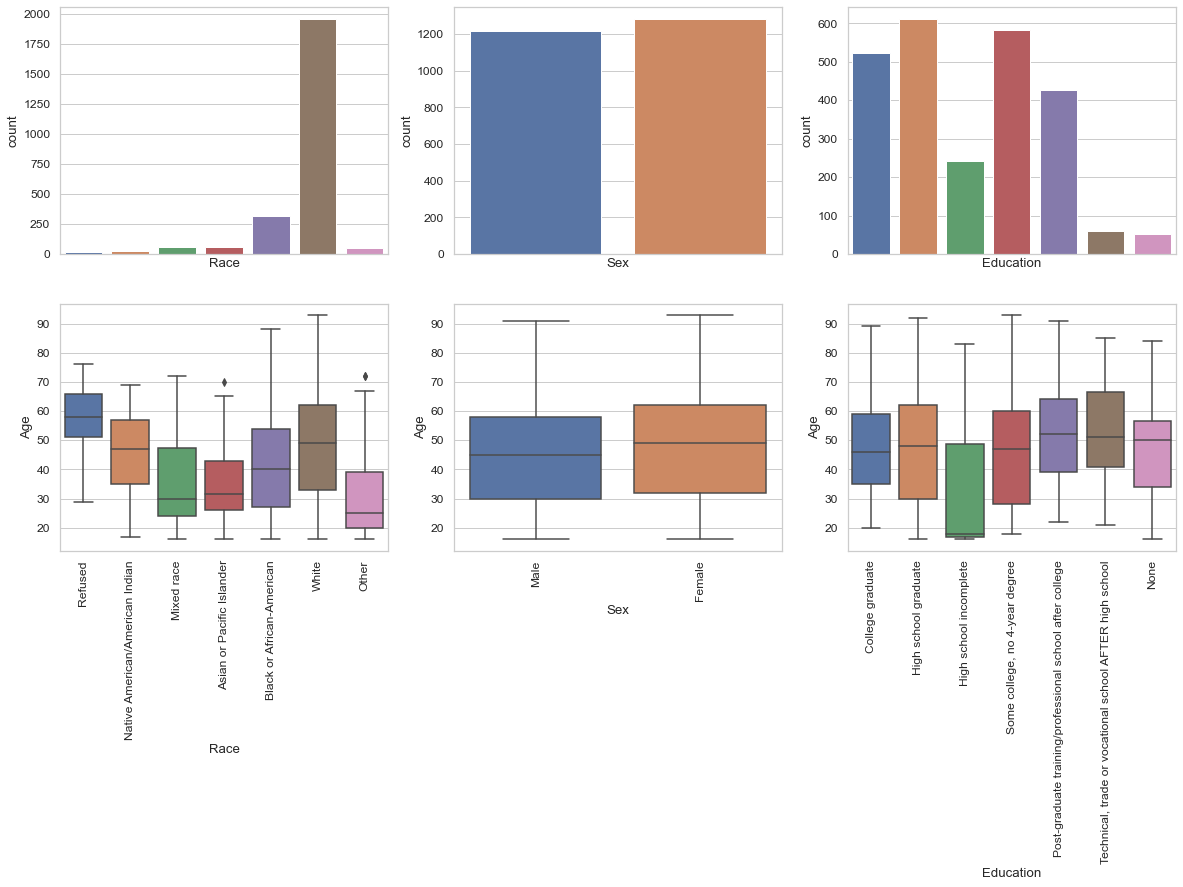

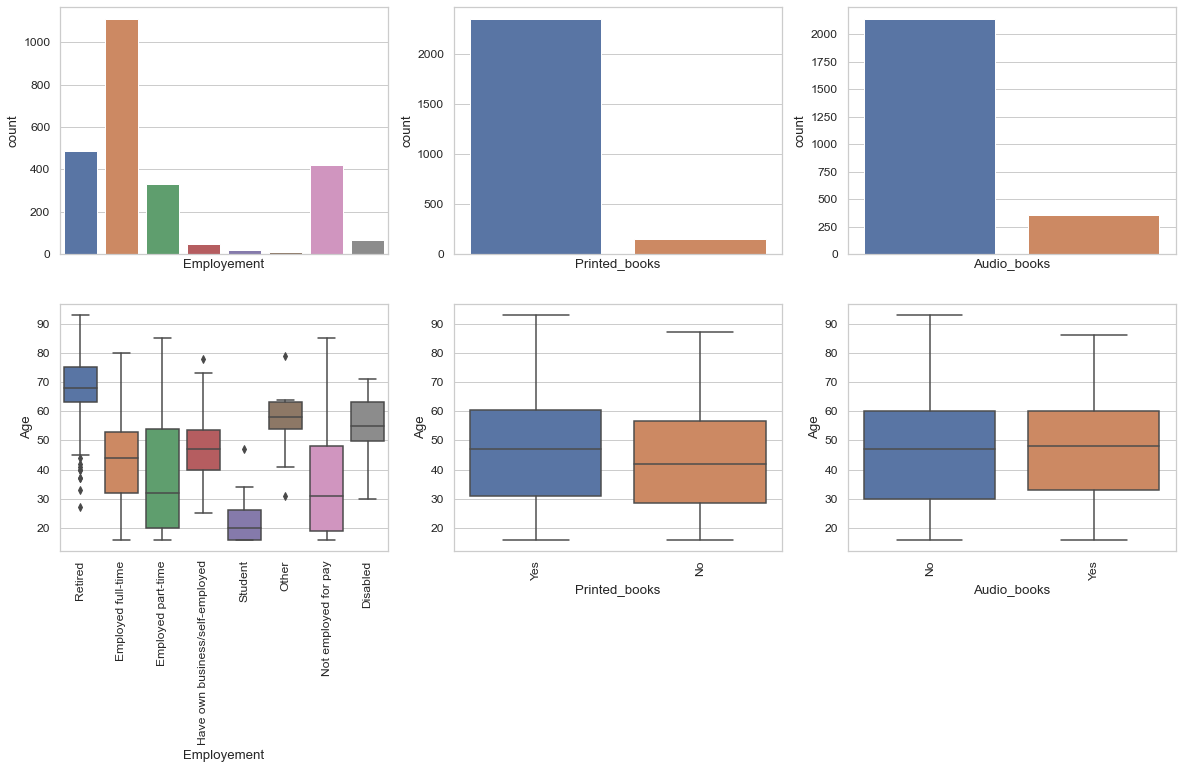

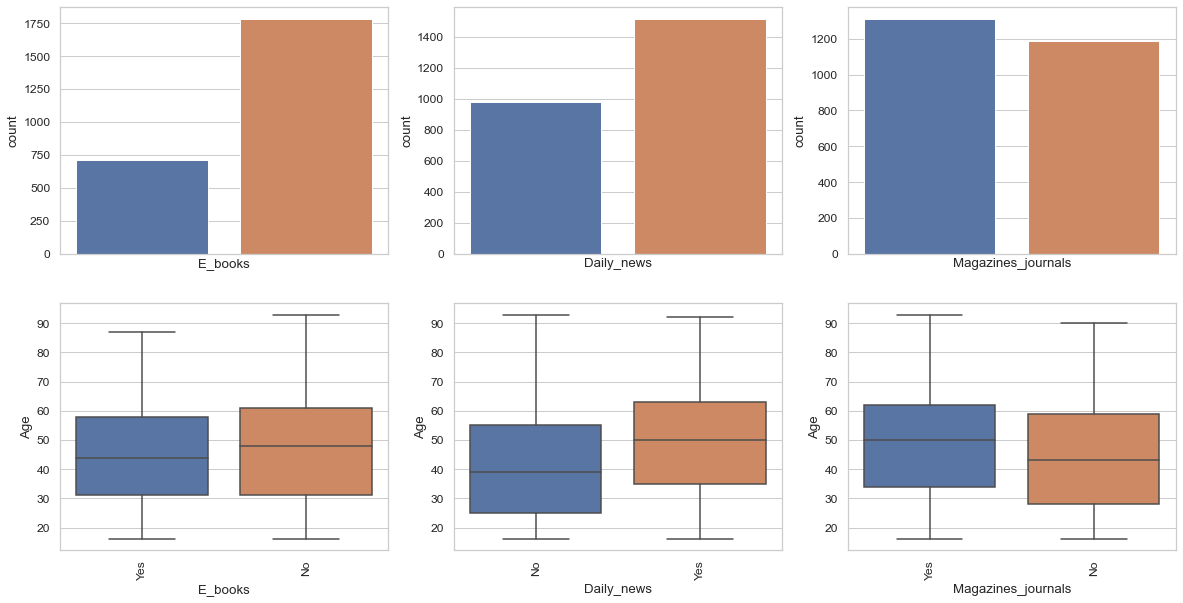

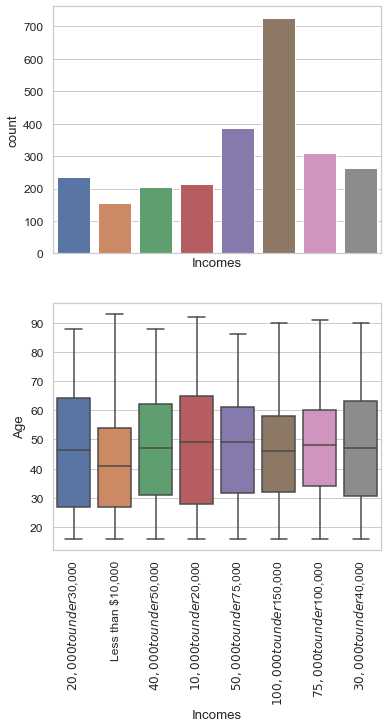

In [31]:
ix = 1
fig = plt.figure(figsize = (20,10))
for c in list(dataset_cat.columns):
    if ix <= 3:
        if c != 'Age':
            ax1 = fig.add_subplot(2,3,ix)
            a = sns.countplot(data = dataset_cat, x=c, ax = ax1)
            a.set(xticklabels=[],xticks=[])
            #a.set(xlabel=None)
            ax2 = fig.add_subplot(2,3,ix+3)
            b = sns.boxplot(data=dataset_cat, x=c, y='Age', ax=ax2)
            b.set_xticklabels(b.get_xticklabels(),rotation=90)
            #sns.violinplot(data=dataset_cat, x=c, y='Age', ax=ax2)
            #sns.swarmplot(data = dataset_cat, x=c, y ='Age', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (20,10))
        ix =1
#plt.tight_layout()

### Frequency Distribution

#### We will start with one variable (Race)

[Text(0, 0, 'Refused'),
 Text(1, 0, 'Native American/American Indian'),
 Text(2, 0, 'Mixed race'),
 Text(3, 0, 'Asian or Pacific Islander'),
 Text(4, 0, 'Black or African-American'),
 Text(5, 0, 'White'),
 Text(6, 0, 'Other')]

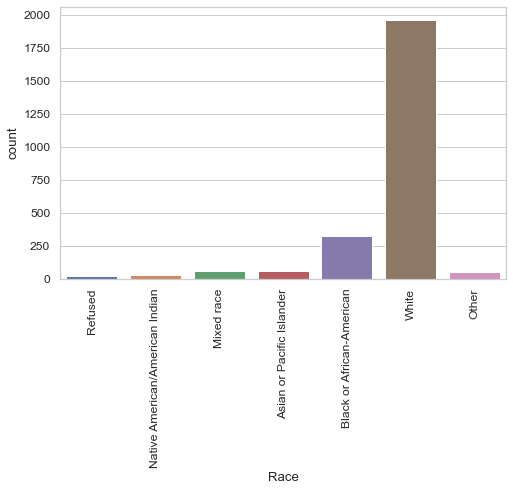

In [32]:
sns_plot  = sns.countplot(data = dataset_cat, x = 'Race')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)

#### Box Plot

[Text(0, 0, 'Refused'),
 Text(1, 0, 'Native American/American Indian'),
 Text(2, 0, 'Mixed race'),
 Text(3, 0, 'Asian or Pacific Islander'),
 Text(4, 0, 'Black or African-American'),
 Text(5, 0, 'White'),
 Text(6, 0, 'Other')]

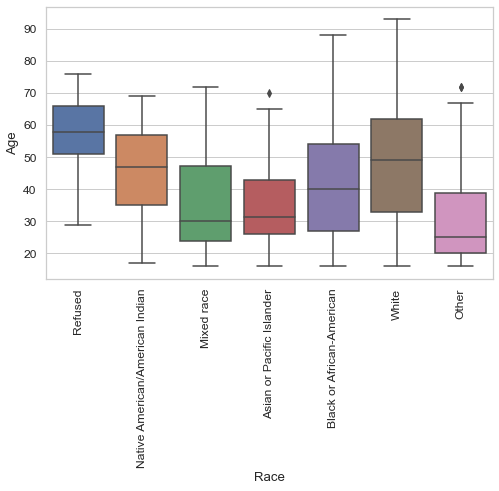

In [33]:
sns_plot = sns.boxplot(data = dataset_cat, x='Race', y='Age')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)

#### Violin Plot

[Text(0.5, 1.0, 'Violin Plot')]

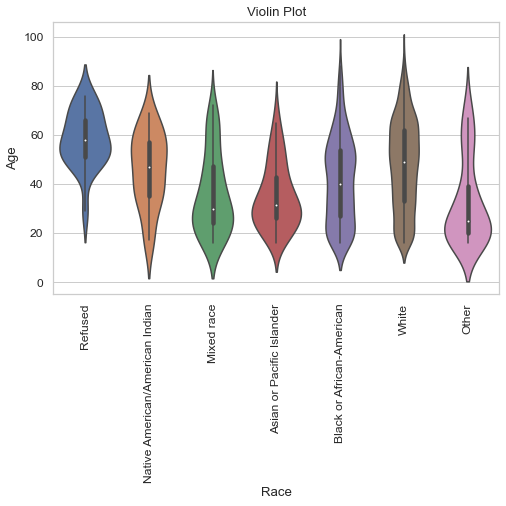

In [34]:
sns_plot = sns.violinplot(data = dataset_cat, x='Race', y='Age')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
sns_plot.set(title='Violin Plot')

#### Swarm Plot

[Text(0.5, 1.0, 'Swarm Plot')]

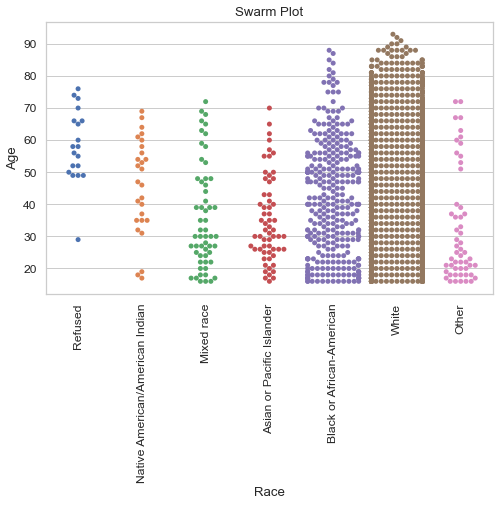

In [35]:
sns_plot = sns.swarmplot(data = dataset_cat, x='Race', y='Age')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
sns_plot.set(title='Swarm Plot')